In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
!pip install --upgrade tables
!pip install --upgrade pydot_ng
!pip install --upgrade pydot
!pip install --upgrade pydotplus
!pip install --upgrade graphviz

    100% |████████████████████████████████| 3.8MB 8.7MB/s 
    100% |████████████████████████████████| 163kB 18.8MB/s 
    100% |████████████████████████████████| 133kB 4.2MB/s 
  Running setup.py bdist_wheel for pydot ... - done
  Stored in directory: /root/.cache/pip/wheels/6a/a5/14/25541ebcdeaf97a37b6d05c7ff15f5bd20f5e91b99d313e5b4
Successfully built pydot
    100% |████████████████████████████████| 286kB 5.9MB/s 
  Running setup.py bdist_wheel for pydotplus ... - done
  Stored in directory: /root/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [0]:
import pandas as pd
import numpy as np
import random

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, CuDNNLSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import Callback
import tensorflow.keras.backend as K

import math
from sklearn.preprocessing import RobustScaler
from collections import deque

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
#Path here

base_path = '/content/drive/My Drive/stocks_project/'
sp500_path = '/content/drive/My Drive/stocks_project/data/sp/^GSPC.csv'
created_data_path = base_path + 'data/created/data500.h5'
created_data_path_new = base_path + 'data/created/data500_new.h5'
technical500_path = created_data_path + 'technical500.h5'
news_path = '/content/drive/My Drive/stocks_project/data/news/'

# Import modules

updated with CuDNNLSTM

In [5]:
!ls "/content/drive/My Drive/"

 Ashish		     Datamining		  'Manoj Sir'	      'Sjsu room-mates'
 big_short_project   dm_stocks		  'Prabhu Ji'	       stocks_project
'Colab Notebooks'    LargeScaleAnalytics   Sawndriya
 data2.h5	    'Manmohan Bhaiya'	   shopping_data.csv


In [0]:
import pandas as pd
#data = pd.read_hdf("/content/drive/My Drive/app/data2.h5", 'new_data');
data = pd.read_hdf(created_data_path_new);

# Import the CSV file with technical data and sentiment analysis

In [7]:
#data = pd.read_hdf('data2.h5', 'new_data')
#data.index = pd.to_datetime(data.index, format='%Y-%m-%d')
data['Y'] = data.lrets.shift(-1)
data.dropna(axis=0, inplace=True)
data.head()

,Adj Close,Volume,lrets,MACD,stochastics,ATR,neg,neu,pos,Y
1990-01-23,331.609985,179300000.0,0.003716,-1.021436,4.863502,4.089997,0.066,0.900,0.034,-0.004079
1990-01-24,330.260010,207830000.0,-0.004079,-1.103580,0.000000,7.539978,0.072,0.880,0.049,-0.012738
1990-01-25,326.079987,172270000.0,-0.012738,-1.323376,0.000000,7.000000,0.047,0.909,0.045,-0.000859
1990-01-26,325.799988,198190000.0,-0.000859,-1.419756,0.000000,7.139985,0.070,0.882,0.049,-0.001843
1990-01-29,325.200012,150770000.0,-0.001843,-1.447355,0.000000,5.519989,0.075,0.846,0.079,-0.006850


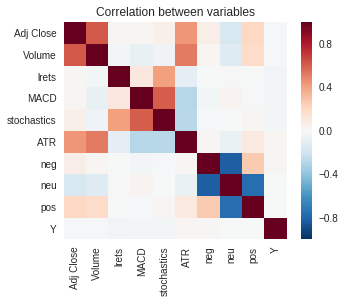

In [8]:
corr = data.corr()
f, ax = plt.subplots(figsize=(5, 4))
plt.title("Correlation between variables")
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Train Test split for recurrent neural net

http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

https://pythonprogramming.net/crypto-rnn-model-deep-learning-python-tensorflow-keras/?completed=/balancing-rnn-data-deep-learning-python-tensorflow-keras/

In [9]:
d = deque('ghi')                 # make a new deque with three items
for elem in d:                   # iterate over the deque's elements
    print (elem.upper())

G
H
I


In [0]:
def preprocess_df(data, shuffle=True):
    mapped_data = data.copy()
    SEQ_LEN = 60

    scaler = RobustScaler()
    data = scaler.fit_transform(data)

    sequential_data = []  # this is a list that will CONTAIN the sequences
    prev_days = deque(maxlen=SEQ_LEN)  # These will be our actual sequences. They are made with deque, which keeps the maximum length by popping out older values as new ones come in

    for i in data:  # iterate over the values
        prev_days.append([n for n in i[:-1]])  # store all but the target

        # if prev_days have 60 days of data
        if len(prev_days) == SEQ_LEN:
            # sequential_data = [prev_days_data, target variable]
            sequential_data.append([np.array(prev_days), i[-1]])  
    if shuffle == True:
        random.shuffle(sequential_data)  # shuffle for good measure.

    X = []
    y = []

    for seq, target in sequential_data:  # going over our new sequential data
        X.append(seq)  # X is the sequences
        y.append(target)  # y is the targets/labels (buys vs sell/notbuy)
    
    if shuffle == True:
        return np.array(X), y 
    else:
        return np.array(X), y, mapped_data, scaler

In [0]:
times = sorted(data.index.values)
last_5pct = sorted(data.index.values)[-int(0.05*len(times))]

validation_main_df = data[(data.index >= last_5pct)]
main_df = data[(data.index < last_5pct)]

prescaler = RobustScaler()
prescaler = prescaler.fit(validation_main_df)

X_train, y_train = preprocess_df(main_df)
X_val, y_val, mapped_data, prescaler = preprocess_df(validation_main_df, shuffle=False)

# Stochastic Gradient descent with restart

Replacing Adam optimizer with SGDR for better performance

https://www.jeremyjordan.me/nn-learning-rate/

In [0]:
class SGDRScheduler(Callback):
    '''Cosine annealing learning rate scheduler with periodic restarts.
    # Usage
        ```python
            schedule = SGDRScheduler(min_lr=1e-5,
                                     max_lr=1e-2,
                                     steps_per_epoch=np.ceil(epoch_size/batch_size),
                                     lr_decay=0.9,
                                     cycle_length=5,
                                     mult_factor=1.5)
            model.fit(X_train, Y_train, epochs=100, callbacks=[schedule])
        ```
    # Arguments
        min_lr: The lower bound of the learning rate range for the experiment.
        max_lr: The upper bound of the learning rate range for the experiment.
        steps_per_epoch: Number of mini-batches in the dataset. Calculated as `np.ceil(epoch_size/batch_size)`. 
        lr_decay: Reduce the max_lr after the completion of each cycle.
                  Ex. To reduce the max_lr by 20% after each cycle, set this value to 0.8.
        cycle_length: Initial number of epochs in a cycle.
        mult_factor: Scale epochs_to_restart after each full cycle completion.
    # References
        Blog post: jeremyjordan.me/nn-learning-rate
        Original paper: http://arxiv.org/abs/1608.03983
    '''
    def __init__(self,
                 min_lr,
                 max_lr,
                 steps_per_epoch,
                 lr_decay=1,
                 cycle_length=10,
                 mult_factor=2):

        self.min_lr = min_lr
        self.max_lr = max_lr
        self.lr_decay = lr_decay

        self.batch_since_restart = 0
        self.next_restart = cycle_length

        self.steps_per_epoch = steps_per_epoch

        self.cycle_length = cycle_length
        self.mult_factor = mult_factor

        self.history = {}

    def clr(self):
        '''Calculate the learning rate.'''
        fraction_to_restart = self.batch_since_restart / (self.steps_per_epoch * self.cycle_length)
        lr = self.min_lr + 0.5 * (self.max_lr - self.min_lr) * (1 + np.cos(fraction_to_restart * np.pi))
        return lr

    def on_train_begin(self, logs={}):
        '''Initialize the learning rate to the minimum value at the start of training.'''
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.max_lr)

    def on_batch_end(self, batch, logs={}):
        '''Record previous batch statistics and update the learning rate.'''
        logs = logs or {}
        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)

        self.batch_since_restart += 1
        K.set_value(self.model.optimizer.lr, self.clr())

    def on_epoch_end(self, epoch, logs={}):
        '''Check for end of current cycle, apply restarts when necessary.'''
        if epoch + 1 == self.next_restart:
            self.batch_since_restart = 0
            self.cycle_length = np.ceil(self.cycle_length * self.mult_factor)
            self.next_restart += self.cycle_length
            self.max_lr *= self.lr_decay
            self.best_weights = self.model.get_weights()

    def on_train_end(self, logs={}):
        '''Set weights to the values from the end of the most recent cycle for best performance.'''
        self.model.set_weights(self.best_weights)

# Learning rate finder

In [0]:
class LRFinder(Callback):
    
    '''
    A simple callback for finding the optimal learning rate range for your model + dataset. 
    
    # Usage
        ```python
            lr_finder = LRFinder(min_lr=1e-5, 
                                 max_lr=1e-2, 
                                 steps_per_epoch=np.ceil(epoch_size/batch_size), 
                                 epochs=3)
            model.fit(X_train, Y_train, callbacks=[lr_finder])
            
            lr_finder.plot_loss()
        ```
    
    # Arguments
        min_lr: The lower bound of the learning rate range for the experiment.
        max_lr: The upper bound of the learning rate range for the experiment.
        steps_per_epoch: Number of mini-batches in the dataset. Calculated as `np.ceil(epoch_size/batch_size)`. 
        epochs: Number of epochs to run experiment. Usually between 2 and 4 epochs is sufficient. 
        
    # References
        Blog post: jeremyjordan.me/nn-learning-rate
        Original paper: https://arxiv.org/abs/1506.01186
    '''
    
    def __init__(self, min_lr=1e-5, max_lr=1e-2, steps_per_epoch=None, epochs=None):
        super().__init__()
        
        self.min_lr = min_lr
        self.max_lr = max_lr
        self.total_iterations = steps_per_epoch * epochs
        self.iteration = 0
        self.history = {}
        
    def clr(self):
        '''Calculate the learning rate.'''
        x = self.iteration / self.total_iterations 
        return self.min_lr + (self.max_lr-self.min_lr) * x
        
    def on_train_begin(self, logs=None):
        '''Initialize the learning rate to the minimum value at the start of training.'''
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.min_lr)
        
    def on_batch_end(self, epoch, logs=None):
        '''Record previous batch statistics and update the learning rate.'''
        logs = logs or {}
        self.iteration += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.iteration)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
            
        K.set_value(self.model.optimizer.lr, self.clr())
 
    def plot_lr(self):
        '''Helper function to quickly inspect the learning rate schedule.'''
        plt.plot(self.history['iterations'], self.history['lr'])
        plt.yscale('log')
        plt.xlabel('Iteration')
        plt.ylabel('Learning rate')
        
    def plot_loss(self):
        '''Helper function to quickly observe the learning rate experiment results.'''
        plt.plot(self.history['lr'], self.history['loss'])
        plt.xscale('log')
        plt.xlabel('Learning rate')
        plt.ylabel('Loss')

# Build up GRU model

- Adam Optimizer = RMSProp + Momentum

- RMSE should be more useful when large errors are particularly undesirable.

- Batchnorm and dropout for regularization

- https://www.quora.com/What-is-the-difference-between-dropout-and-batch-normalization

In [0]:
def build_model():
    model = Sequential()
    model.add(CuDNNLSTM(256, input_shape=(X_train.shape[1:]), return_sequences=True))
    model.add(BatchNormalization())  #normalizes activation outputs, same reason you want to normalize your input data.

    model.add(CuDNNLSTM(128, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    
    model.add(CuDNNLSTM(64))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(1, activation='tanh'))
    
    opt = tf.keras.optimizers.RMSprop(lr=7e-3)
    model.compile(loss='mse',optimizer=opt, metrics=['mse'])
    return model

In [0]:
model = build_model()

In [16]:
from keras.utils import plot_model

#later plot the model image
#plot_model(model, to_file='model.png')

Using TensorFlow backend.


Epoch 1/1
6113/6113 [==============================] - 16s 3ms/step - loss: 1.8970 - mean_squared_error: 1.8970


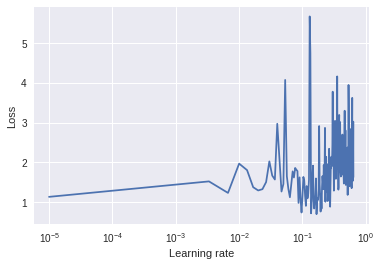

In [17]:
# find learning rate first
epoch_size = 20
batch_size = 256

lr_finder = LRFinder(min_lr=1e-5, 
                     max_lr=1e-2, 
                     steps_per_epoch=np.ceil(epoch_size/batch_size), 
                     epochs=3)
model.fit(X_train, y_train, callbacks=[lr_finder])

lr_finder.plot_loss()

In [18]:
model = build_model()
schedule = SGDRScheduler(min_lr=1e-3,
                         max_lr=1e-2,
                         steps_per_epoch=np.ceil(epoch_size/batch_size),
                         lr_decay=0.9,
                         cycle_length= 3,
                         mult_factor=1.5)

model.fit(
    X_train,
    y_train,
    epochs=20, 
    callbacks=[schedule],
    validation_split=0.1,
    verbose=1)

Train on 5501 samples, validate on 612 samples
Epoch 1/20
5501/5501 [==============================] - 13s 2ms/step - loss: 1.4914 - mean_squared_error: 1.4914 - val_loss: 1.2248 - val_mean_squared_error: 1.2248
Epoch 2/20
5501/5501 [==============================] - 12s 2ms/step - loss: 1.1994 - mean_squared_error: 1.1994 - val_loss: 1.3339 - val_mean_squared_error: 1.3339
Epoch 3/20
5501/5501 [==============================] - 11s 2ms/step - loss: 1.1629 - mean_squared_error: 1.1629 - val_loss: 1.1951 - val_mean_squared_error: 1.1951
Epoch 4/20
5501/5501 [==============================] - 11s 2ms/step - loss: 1.1518 - mean_squared_error: 1.1518 - val_loss: 1.1799 - val_mean_squared_error: 1.1799
Epoch 5/20
5501/5501 [==============================] - 11s 2ms/step - loss: 1.1526 - mean_squared_error: 1.1526 - val_loss: 1.1904 - val_mean_squared_error: 1.1904
Epoch 6/20
5501/5501 [==============================] - 11s 2ms/step - loss: 1.1518 - mean_squared_error: 1.1518 - val_loss: 1.1

In [19]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train RMSE: %2f' % math.sqrt(trainScore[0]))

testScore = model.evaluate(X_val, y_val, verbose=0)
print('Test RMSE: %2f'% math.sqrt(testScore[0]))

Train RMSE: 1.070363
Test RMSE: 1.331070


In [0]:
p = model.predict(X_val)

In [21]:
X_val.shape

(265, 60, 9)

In [22]:
p

array([[-0.05817629],
       [-0.02135868],
       [-0.06142704],
       [-0.06048125],
       [-0.01353059],
       [-0.05764252],
       [-0.06093664],
       [-0.06100577],
       [-0.02566611],
       [-0.0580745 ],
       [ 0.00552801],
       [ 0.05918324],
       [ 0.01122514],
       [-0.05836395],
       [-0.00774597],
       [ 0.07174911],
       [ 0.06157056],
       [-0.00718867],
       [ 0.01761119],
       [ 0.0141922 ],
       [ 0.06671192],
       [-0.06387156],
       [ 0.01950857],
       [ 0.01753494],
       [ 0.04225343],
       [ 0.05511175],
       [-0.06434354],
       [-0.06105744],
       [-0.05764367],
       [ 0.05624019],
       [-0.06133306],
       [ 0.00942314],
       [ 0.00983988],
       [-0.06001812],
       [ 0.00099517],
       [ 0.01321981],
       [-0.05830712],
       [-0.05677177],
       [-0.0556858 ],
       [-0.0206908 ],
       [-0.02226386],
       [-0.01240065],
       [ 0.01240928],
       [-0.05527855],
       [-0.06198844],
       [-0

In [23]:
p.shape

(265, 1)

In [24]:
data.shape

(6496, 10)

In [0]:
#padding = np.zeros((1249, 15))
#padding.shape

In [0]:
#pred_result = pd.DataFrame(data=padding)

In [0]:
#pred_result.shape

In [0]:
#pred_result.keys()

In [0]:
#pred_result.tail

In [0]:
#pred_result[14]

In [31]:
data.tail()

,Adj Close,Volume,lrets,MACD,stochastics,ATR,neg,neu,pos,Y
2018-10-03,2925.510010,3.598710e+09,0.000711,-1.724414,87.508948,18.500000,0.133,0.778,0.089,-0.008203
2018-10-04,2901.610107,3.496860e+09,-0.008203,-3.498974,30.536527,41.590088,0.085,0.832,0.083,-0.005543
2018-10-05,2885.570068,3.328980e+09,-0.005543,-5.951191,0.000000,40.349854,0.116,0.792,0.092,-0.000395
2018-10-08,2884.429932,3.330320e+09,-0.000395,-7.726477,0.000000,27.369873,0.095,0.808,0.097,-0.001419
2018-10-09,2880.340088,3.520500e+09,-0.001419,-9.170761,0.000000,20.560058,0.089,0.834,0.077,-0.033416


If the chosen model fits worse than a horizontal line, then R2 is negative.

In [32]:
p.shape

(265, 1)

In [33]:
y_val

[0.42160153012322943,
 -0.013360737272669402,
 -0.32404249152682696,
 0.16865903776486527,
 0.10334862744280411,
 0.04561782272685021,
 -0.03387395468854142,
 -0.6499533199468297,
 -0.03162726639867636,
 -0.5118399767131062,
 -0.12783673888811195,
 0.5417371445360212,
 0.06138654893230689,
 0.4784424487292052,
 0.5065746745147952,
 0.2206635002745602,
 0.06841772546288231,
 0.8015776737777502,
 -0.3195092686777222,
 -0.4418741731470299,
 0.24795180481230314,
 0.1613700476124172,
 -0.4221635932850994,
 0.00685151189193033,
 0.15256535670453844,
 -0.02748598723613384,
 -0.015831030965340852,
 -0.08507064865192934,
 0.7134458837003307,
 -0.8054197128770189,
 0.1303912029614719,
 -0.9213821495092647,
 0.07246320531722343,
 1.204477534558223,
 -0.6745334725956973,
 0.017935312394565465,
 0.12608461811930485,
 -0.10814342438458965,
 0.3771244285385736,
 0.07251414477791808,
 -0.17152325562972368,
 0.10130074351463678,
 -0.7700715476281996,
 -0.29005482626842716,
 0.024479105938242166,
 -0.52

In [0]:
#SP-500:
padding = np.zeros((265, 9))
pred_result = pd.DataFrame(data=padding)
pred_result['9'] = p
pred = prescaler.inverse_transform(pred_result)

val_result = pd.DataFrame(data=padding)
val_result['9'] = y_val
val = prescaler.inverse_transform(val_result)

# Plotting Predicted value vs True value

In [0]:
#Intrinio App model
#working code!!

#p is predicted values (3x1)
#y_val is actual values (3x1)

#padding = np.zeros((3, 9))

#Predicted Values
#pred_result = pd.DataFrame(data=padding)
#pred_result['9'] = p
#pred = prescaler.inverse_transform(pred_result)


#Actual Values
#val_result = pd.DataFrame(data=padding)
#val_result['9'] = y_val
#val = prescaler.inverse_transform(val_result)

In [0]:
pred = pred[:, -1]
val = val[:, -1]

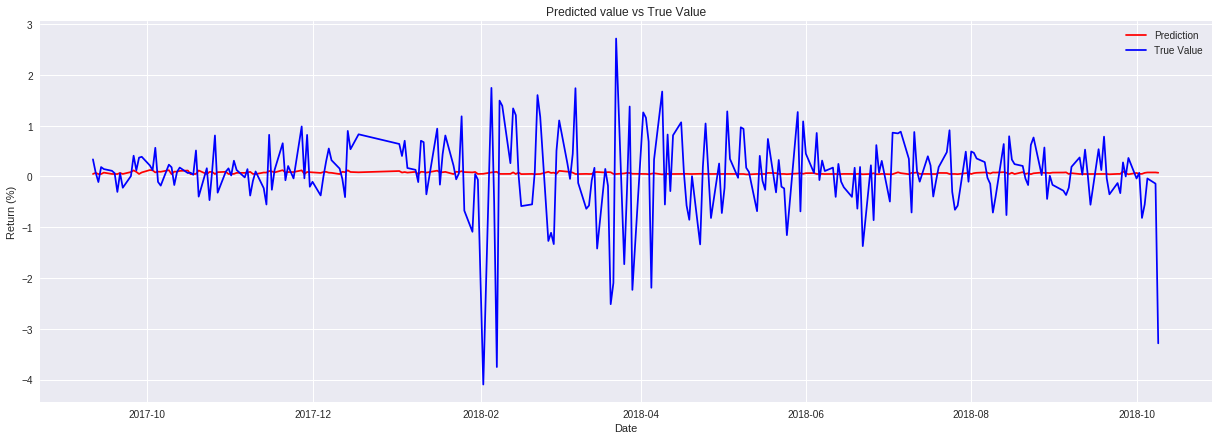

In [37]:
plt.figure(figsize=(21,7))
plt.plot(data.index[-len(pred):], np.expm1(pred)*100, color='red', label='Prediction')
plt.plot(data.index[-len(val):], np.expm1(val)*100, color='blue', label='True Value')
plt.xlabel("Date")
plt.ylabel("Return (%)")
plt.title('Predicted value vs True Value')
plt.legend(loc='best')
plt.show()

# The residual plot is not normal

((array([-2.79285789, -2.4926144 , -2.32228794, -2.20074297, -2.10500338,
         -2.02538542, -1.95685437, -1.89644383, -1.84225287, -1.79298727,
         -1.74772448, -1.70578274, -1.66664344, -1.62990245, -1.59523854,
         -1.56239191, -1.53114937, -1.50133371, -1.47279597, -1.44540967,
         -1.41906647, -1.39367282, -1.36914736, -1.34541887, -1.32242463,
         -1.30010909, -1.27842285, -1.25732173, -1.23676605, -1.21672008,
         -1.19715146, -1.17803083, -1.15933146, -1.14102891, -1.12310081,
         -1.10552661, -1.08828738, -1.07136565, -1.05474528, -1.03841126,
         -1.0223497 , -1.00654764, -0.99099301, -0.97567452, -0.96058162,
         -0.94570443, -0.93103367, -0.9165606 , -0.90227702, -0.8881752 ,
         -0.87424783, -0.860488  , -0.8468892 , -0.83344523, -0.82015025,
         -0.80699867, -0.79398521, -0.78110485, -0.76835279, -0.75572448,
         -0.74321554, -0.73082184, -0.71853938, -0.70636439, -0.69429321,
         -0.68232236, -0.67044849, -0.

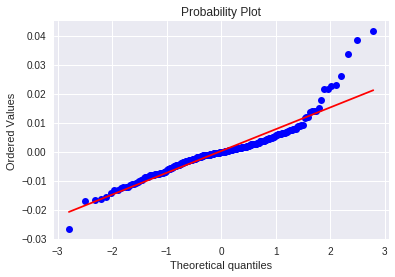

In [38]:
import scipy.stats as stats
residual = np.expm1(pred) - np.expm1(val)
stats.probplot(residual, dist="norm", plot=plt)

In [0]:
# Updates to be continued